In [3]:
import requests
import base64
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:


def filter_none_values(data):
    return {key: value for key, value in data.items() if value is not None}
    
def run_inference(prompt,respb64=None):
    # endpoint_id = endpoint_id
    # api_key = runpod_key
    
    url = f"https://api.runpod.ai/v2/{endpoint_id}/runsync"
    headers = {
        "accept": "application/json",
        "authorization": runpod_key,
        "content-type": "application/json"
    }
    input= {
            "prompt": prompt,
            "input_image": respb64
            # "width": 512,
            # "num_outputs": 1,
            # "num_inference_steps": 50,
            # "guidance_scale": 7.5,
            # "scheduler": "KLMS"
        }
    
    data = {
        "input": filter_none_values(input)
    }
    # print(data)
    # Make the POST request
    response = requests.post(url, headers=headers, json=data)
    
    return response


In [5]:
def display_img(response):
    resp=response.json()
    imgb64=resp['output']['images'][0]
    
    # Example base64 string (replace with your base64-encoded image)
    base64_string = imgb64
    
    # Decode the base64 string
    image_data = base64.b64decode(base64_string)
    
    # Create an image from the decoded data
    image = Image.open(BytesIO(image_data))
    
    # Display the image using matplotlib
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels
    plt.show()
    return base64_string

In [6]:
prompt = "playing metal guitar"
response=run_inference(prompt)

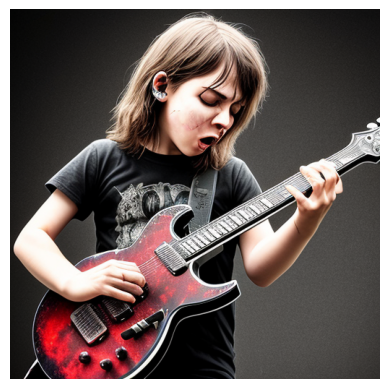

In [7]:
respb64=display_img(response)

In [8]:
resp=response.json()
imgb64=resp['output']['images'][0]

# Example base64 string (replace with your base64-encoded image)
base64_string = imgb64
# Decode the base64 string
image_data = base64.b64decode(base64_string)

# Create an image from the decoded data
image = Image.open(BytesIO(image_data))

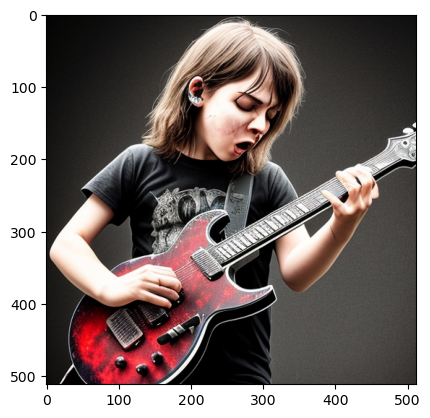

In [9]:
image.save